In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plot
from PIL import Image
import matplotlib.image as mpimg
import os
import numpy as np
%matplotlib inline
#PIL stands for python image library . It is de facto python image processing 
#It incorporates lightweight image processing tools that aids in editing, creating and saving images. 
#Support for Python Imaging Library got discontinued in 2011, but a project named pillow forked the original PIL project and
#added Python3.x support to it. Pillow was announced as a replacement for PIL for future usage.
#Pillow supports a large number of image file formats including BMP, PNG, JPEG, and TIFF.
#The library encourages adding support for newer formats in the library by creating new file decoders.

In [2]:
img=Image.open('tiger.png')
img.show()# it will open it in picture viewer

In [3]:
img_np=np.asarray(img)
img_np

array([[[164, 160, 159],
        [165, 161, 160],
        [164, 163, 161],
        ...,
        [160, 128,  90],
        [158, 125,  90],
        [161, 128,  93]],

       [[164, 160, 159],
        [164, 160, 159],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]],

       [[163, 159, 156],
        [164, 160, 157],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]],

       ...,

       [[ 93,  94,  96],
        [ 93,  94,  96],
        [ 92,  93,  95],
        ...,
        [120, 116, 107],
        [121, 117, 108],
        [122, 118, 109]],

       [[ 93,  94,  96],
        [ 93,  94,  96],
        [ 92,  93,  95],
        ...,
        [120, 116, 107],
        [121, 117, 108],
        [122, 118, 109]],

       [[ 93,  94,  96],
        [ 93,  94,  96],
        [ 92,  93,  95],
        ...,
        [119, 115, 106],
        [121, 117, 108],
        [122, 118, 109]]

In [4]:
img_np.shape

(720, 1280, 3)

In [5]:
#For feeding this data into the algorithm, you must change the shape of this data into a dataset with 720*1280 =921600 rows and 3 columns
pixels=img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(921600, 3)

In [6]:
model=KMeans(n_clusters=16)
model.fit(pixels)

KMeans(n_clusters=16)

In [8]:
#After the model is trained, model.labels_ is used to obtain the number of cluster that is assigned to each data point or each pixel.
#model.cluster_centers_ gives us the coordinates or the RGB values of the 16 cluster centers.
pixel_centroids = model.labels_
cluster_centers=model.cluster_centers_
pixel_centroids

array([11, 11, 11, ...,  0,  0,  0])

In [9]:
cluster_centers

array([[108.61299198, 109.14140678, 104.28080505],
       [175.27262206, 175.93030919, 176.18790892],
       [ 68.20593203,  66.75271941,  56.37624485],
       [230.12231967, 229.04422735, 229.22887731],
       [ 24.17208485,  18.60144525,  16.37802363],
       [ 97.74396445, 139.73524762,  84.96440627],
       [129.86934836, 133.89402341, 122.97743743],
       [135.95166542, 108.29258701,  83.45033337],
       [210.98534146, 167.76430692, 133.63828723],
       [106.05322999,  69.44136745,  43.29225162],
       [202.53977726, 200.04694132, 198.5539139 ],
       [152.74186626, 155.46832836, 153.61656101],
       [ 50.26297856,  40.67023246,  35.27347935],
       [176.59770169, 130.33568513, 106.41874513],
       [ 58.05053176, 124.67229089,  40.62009198],
       [ 92.04265152,  89.08239446,  79.78018946]])

In [10]:
final=np.zeros((pixel_centroids.shape[0],3))
for cluster_no in range(16):
    final[pixel_centroids==cluster_no]=cluster_centers[cluster_no]
final[0:5]

array([[152.74186626, 155.46832836, 153.61656101],
       [152.74186626, 155.46832836, 153.61656101],
       [152.74186626, 155.46832836, 153.61656101],
       [152.74186626, 155.46832836, 153.61656101],
       [152.74186626, 155.46832836, 153.61656101]])

In [11]:
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(720, 1280, 3)

In [13]:
comp_image=Image.fromarray(np.uint8(comp_image))
comp_image.save('tiger_compressed.png')
img_1 = mpimg.imread('tiger.png')
img_2 = mpimg.imread('tiger_compressed.png')

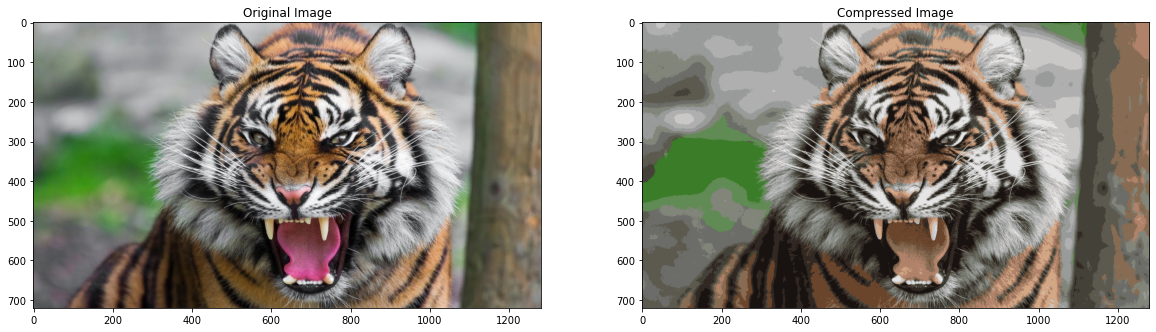

In [16]:
fig,(ax1,ax2) = plot.subplots(1,2, figsize=(20,20))
ax1.imshow(img_1)
ax1.set_title('Original Image')
ax2.imshow(img_2)
ax2.set_title('Compressed Image')
plot.show()